# 🧠 KLASIFIKASI DATA OBESITAS
**BENGKEL KODING – TEKNIK INFORMATIKA – UNIVERSITAS DIAN NUSWANTORO**  
_tahapan EDA, preprocessing, modeling, dan tuning data obesitas._

## 1. Exploratory Data Analysis (EDA)
### 📥 Load Dataset & Load library

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [37]:
data = pd.read_csv('/content/ObesityDataSet.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
# Tangani nilai '?' di kolom numerik
for col in ['Age', 'Height', 'Weight']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop baris yang mengandung NaN setelah konversi
data.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)
data.reset_index(drop=True, inplace=True)


In [39]:
data.shape

(2048, 17)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2048 non-null   float64
 1   Gender                          2039 non-null   object 
 2   Height                          2048 non-null   float64
 3   Weight                          2048 non-null   float64
 4   CALC                            2043 non-null   object 
 5   FAVC                            2037 non-null   object 
 6   FCVC                            2040 non-null   object 
 7   NCP                             2036 non-null   object 
 8   SCC                             2038 non-null   object 
 9   SMOKE                           2043 non-null   object 
 10  CH2O                            2042 non-null   object 
 11  family_history_with_overweight  2035 non-null   object 
 12  FAF                             20

In [41]:
data.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2048.000000,2039,2048.000000,2048.000000,2043,2037,2040,2036,2038,2043,2042,2035,2040,2039,2037,2042,2048
unique,NaN,3,NaN,NaN,5,3,788,621,3,3,1227,3,1154,1101,5,6,7
top,NaN,Male,NaN,NaN,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,NaN,1023,NaN,NaN,1344,1790,626,1142,1937,1991,429,1655,392,533,1699,1526,342
mean,24.702986,NaN,1.706974,88.658748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.422411,NaN,0.118227,36.336387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,14.000000,NaN,1.450000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.954094,NaN,1.630000,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,22.780507,NaN,1.701490,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,26.000000,NaN,1.770031,108.014255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔍 Cek Missing Values, Unique Values, dan Duplikasi

In [42]:
data.isnull().sum()

,0
Age,0
Gender,9
Height,0
Weight,0
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [43]:
data.nunique()

,0
Age,1370
Gender,3
Height,1533
Weight,1485
CALC,5
FAVC,3
FCVC,788
NCP,621
SCC,3
SMOKE,3


In [44]:
data.duplicated().sum()

np.int64(18)

### ⚖️ Distribusi Kelas Target

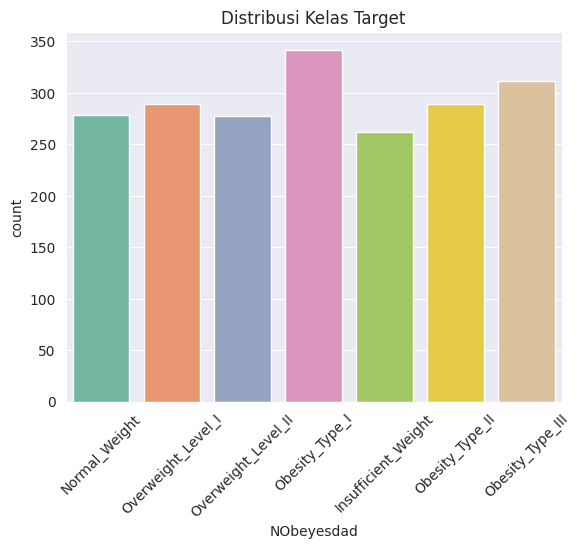

In [45]:
sns.countplot(x='NObeyesdad', data=data, palette='Set2')
plt.title('Distribusi Kelas Target')
plt.xticks(rotation=45)
plt.show()

### 📦 Visualisasi Boxplot & Outlier

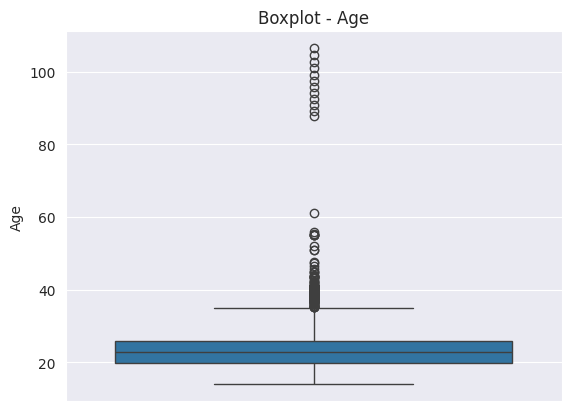

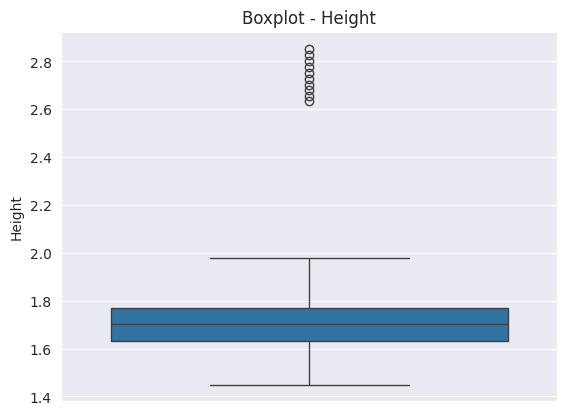

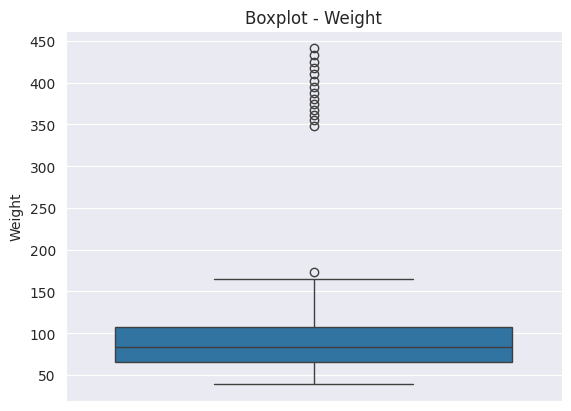

In [46]:
numerik = ['Age', 'Height', 'Weight']
for col in numerik:
    sns.boxplot(data[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

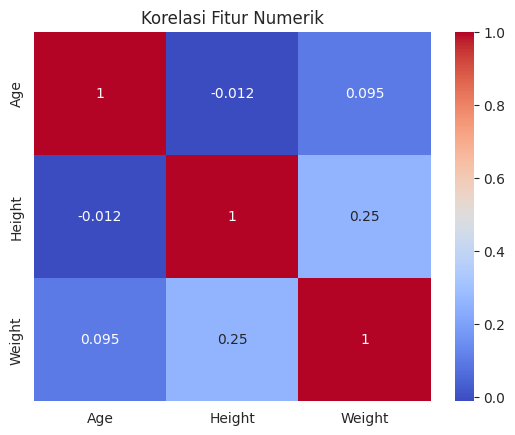

In [47]:
# Korelasi fitur numerik
sns.heatmap(data[numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

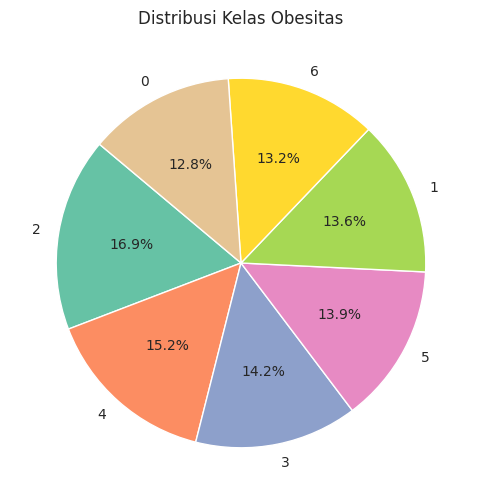

In [65]:
#piechart
plt.figure(figsize=(6,6))
data['NObeyesdad'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2")
)
plt.ylabel('')
plt.title('Distribusi Kelas Obesitas')
plt.show()

### ✅ Kesimpulan EDA

In [48]:
# Tulis analisis kesimpulan EDA di sini sebagai markdown/manual atau cell kode komentar

## 2. Preprocessing Data

### 🧹 Tangani Outlier dengan Z-score

In [49]:
z_scores = np.abs(stats.zscore(data[numerik]))
data = data[(z_scores < 3).all(axis=1)]
data.reset_index(drop=True, inplace=True)
data.shape

(2002, 17)

### 🔠 Encoding Fitur Kategori

In [50]:
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
    data[col] = le.fit_transform(data[col])

### ⚖️ Tangani Ketidakseimbangan Data

In [51]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

### 🔄 Normalisasi Data

In [52]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [53]:
X_scaled[:5]

array([[0.44019528, 0.33333333, 0.81818182, 0.3699422 , 0.8       ,
        0.33333333, 0.20231959, 0.75493421, 0.33333333, 0.33333333,
        0.43      , 0.66666667, 0.        , 0.73215941, 0.6       ,
        0.66666667],
       [0.44019528, 0.33333333, 0.76767677, 0.32369942, 0.6       ,
        0.33333333, 0.98840206, 0.75493421, 0.66666667, 0.66666667,
        0.99166667, 0.66666667, 0.99559083, 0.        , 0.6       ,
        0.66666667],
       [0.48211864, 0.66666667, 0.90909091, 0.44508671, 0.4       ,
        0.33333333, 0.20231959, 0.75493421, 0.33333333, 0.33333333,
        0.43      , 0.66666667, 0.89506173, 0.73215941, 0.6       ,
        0.66666667],
       [0.56596536, 0.66666667, 0.90909091, 0.50289017, 0.4       ,
        0.33333333, 0.98840206, 0.75493421, 0.33333333, 0.33333333,
        0.43      , 0.33333333, 0.89506173, 0.        , 0.6       ,
        0.83333333],
       [0.46115696, 0.66666667, 0.8989899 , 0.51907514, 0.6       ,
        0.33333333, 0.20231959, 

### ✅ Kesimpulan Preprocessing

In [54]:
# Tulis kesimpulan preprocessing di sini sebagai komentar/manual

## 3. Pemodelan dan Evaluasi

### 🧪 Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

### 🔍 Model: Logistic Regression, KNN, Decision Tree

In [56]:
models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Tree': DecisionTreeClassifier()
}

In [57]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds, average='weighted'),
        'recall': recall_score(y_test, preds, average='weighted'),
        'f1': f1_score(y_test, preds, average='weighted')
    }
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, preds))


LogReg Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.58      0.41      0.48        75
           2       0.76      0.63      0.69        76
           3       0.69      0.96      0.80        55
           4       0.87      0.98      0.93        63
           5       0.62      0.56      0.59        70
           6       0.48      0.49      0.48        59

    accuracy                           0.69       475
   macro avg       0.68      0.70      0.68       475
weighted avg       0.68      0.69      0.68       475


KNN Classification Report
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        77
           1       0.73      0.49      0.59        75
           2       0.71      0.74      0.72        76
           3       0.75      0.93      0.83        55
           4       0.89      0.98      0.93        63
           5       0.

### 📊 Visualisasi Performa Model

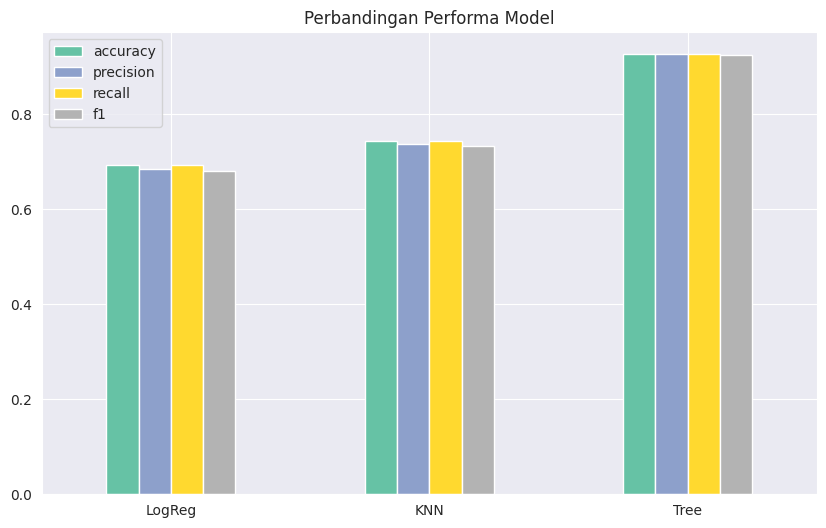

In [58]:
pd.DataFrame(results).T.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Perbandingan Performa Model')
plt.xticks(rotation=0)
plt.show()

### ✅ Kesimpulan Pemodelan

In [59]:
# Tulis kesimpulan evaluasi di sini sebagai komentar/manual

## 4. Hyperparameter Tuning

### 🔧 GridSearchCV untuk KNN

In [60]:
param_grid = {'n_neighbors': list(range(3, 11))}
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs.fit(X_train, y_train)
print('Best Params:', gs.best_params_)

Best Params: {'n_neighbors': 3}


### ✅ Evaluasi Ulang dengan Model Terbaik

In [61]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.72      0.52      0.60        75
           2       0.77      0.78      0.77        76
           3       0.85      0.91      0.88        55
           4       0.91      0.98      0.95        63
           5       0.66      0.64      0.65        70
           6       0.72      0.73      0.72        59

    accuracy                           0.77       475
   macro avg       0.77      0.78      0.77       475
weighted avg       0.77      0.77      0.76       475



In [62]:
tuned_results = {
    'KNN Tuned': {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }
}

### 📊 Visualisasi Perbandingan Sebelum & Sesudah Tuning

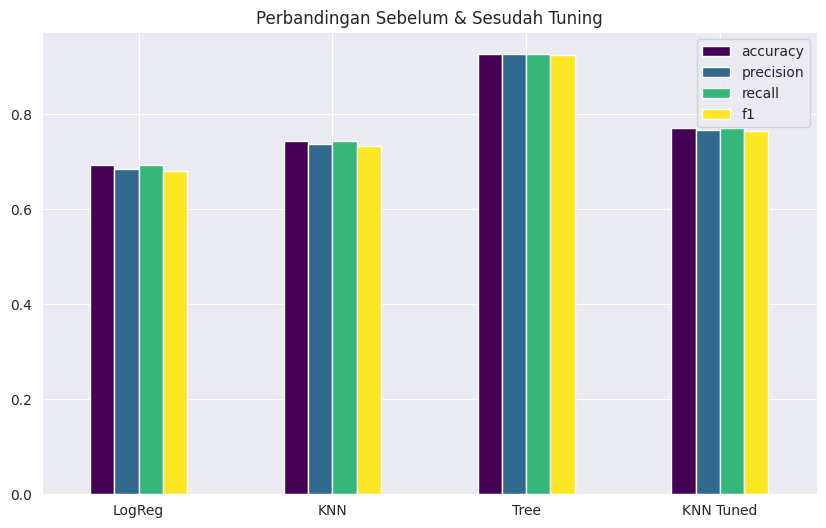

In [63]:
combined = pd.DataFrame(results).T
combined.loc['KNN Tuned'] = tuned_results['KNN Tuned']
combined.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Perbandingan Sebelum & Sesudah Tuning')
plt.xticks(rotation=0)
plt.show()

### ✅ Kesimpulan Tuning

In [64]:
# Tulis kesimpulan tuning di sini sebagai komentar/manual